In [88]:
import numpy as np
import matplotlib.pyplot as plt
import random
import imageio

### Zad.1: Deterministyczny automat komórkowy

In [89]:
N = 100
probabilities = (0.4, 0.5, 0.6)
rule = {
    '111': 1,
    '110': 0,
    '101': 1,
    '100': 1,
    '011': 1,
    '010': 0,
    '001': 0,
    '000': 0
}

In [90]:
def create_binary_array(size, prob):
    index = np.random.choice(size, int(prob*size))
    array = np.zeros(size, dtype =int)
    array[index] = 1
    return array

In [91]:
def set_new_value(array, idx, rule):
    current = array[idx]
    l_neighbour = array[idx-1]
    if idx+1>=len(array):
        r_neighbour = array[0]
    else:
        r_neighbour = array[idx+1]
    triplet = str(l_neighbour) + str(current) + str(r_neighbour)
    return rule[triplet]   

In [92]:
def cellular_automata(rule, size, prob, steps):
    array = create_binary_array(size, prob)
    image = array
    for _ in range(steps):
        new_array = []
        for i in range(size):
            new_value = set_new_value(array, i, rule)
            new_array.append(new_value)
        array = np.array(new_array)
        image = np.vstack((image, array))
    return image

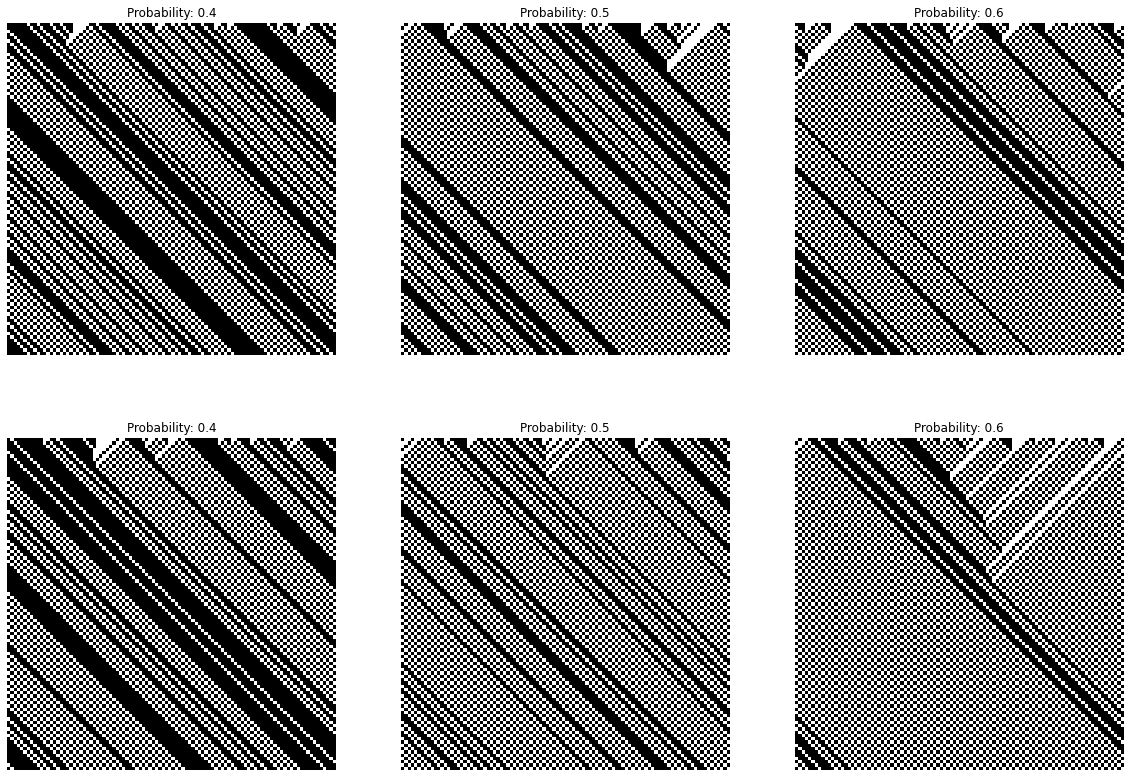

In [93]:
plt.figure(figsize =(20,14))
for i, prob in enumerate(probabilities):
    for j in range(2):
        image = cellular_automata(rule, N, prob, 100)
        plt.subplot(2, 3, i+1+3*j)
        plt.imshow(image, cmap='gray')
        plt.title(f'Probability: {prob}')
        plt.axis('off')

W wyniku kolejnych kroków algorytmu początkowo nieuporządkowana konfiguracja staje się powtarzalna, powstaje atraktor.

Atraktor pojawia się dla wszystkich przetestowanych gęstości początkowej miejsc aktywnych.
Im większa gęstość miejsc aktywnych tym więcej kroków potrzeba by osiągnąć atraktor, szczególnie gdy miejsa aktywne sąsiadują ze sobą.

### Zad.2: Probabilistyczny automat komórkowy (model ruchu ulicznego Nagela-Schreckenberga)


In [94]:
N = 100
Vmax = 2
probability = 0.2
car_density = (0.24, 0.48)

In [95]:
def create_binary_array(size, prob):
    index = np.random.choice(size, int(prob*size))
    array = np.ones(size, dtype =int)
    array[index] = 0
    array *= -1
    return array

In [96]:
def calculate_velocity(v, d, Vmax, prob):
    vi = min(v+1, d-1, Vmax)
    x = random.choices([0, 1], weights=(prob, 1-prob), k=1)[0]
    v_next = max(vi-1, 0) if x==0 else vi
    return v_next

In [97]:
def set_new_velocity(array, idx, Vmax, prob):
    car_index = np.where(array != -1)[0]
    v = array[idx]
    if v == -1:
        v_next = -1
    else:
        i = car_index.tolist().index(idx)
        if i+1 >= len(car_index):
            next_car_idx = car_index[0]
            d = len(array) - idx + next_car_idx
        else:   
            next_car_idx = car_index[i+1]
            d = next_car_idx - idx
        v_next = calculate_velocity(v, d, Vmax, prob)
    return v_next

In [98]:
def cellular_automata(size, density, steps, Vmax, prob):
    array = create_binary_array(size, density)
    states = [array]
    image = array
    for _ in range(steps):
        new_array = np.ones(size, dtype = int) * -1
        for i in range(size):
            v_next = set_new_velocity(array, i, Vmax, prob)
            x_next = i + v_next
            if x_next >= size:
                x_next -= size
            if v_next != -1:
                new_array[x_next] = v_next
        array = new_array
        states.append(array)
        image = np.vstack((image, array))
    return image, states

### Wizualizacja działania modelu dla gęstości początkowej samochodów równej: 0.24 i 0.48 oraz prędkości maksymalnej wynoszącej 2 lub 3

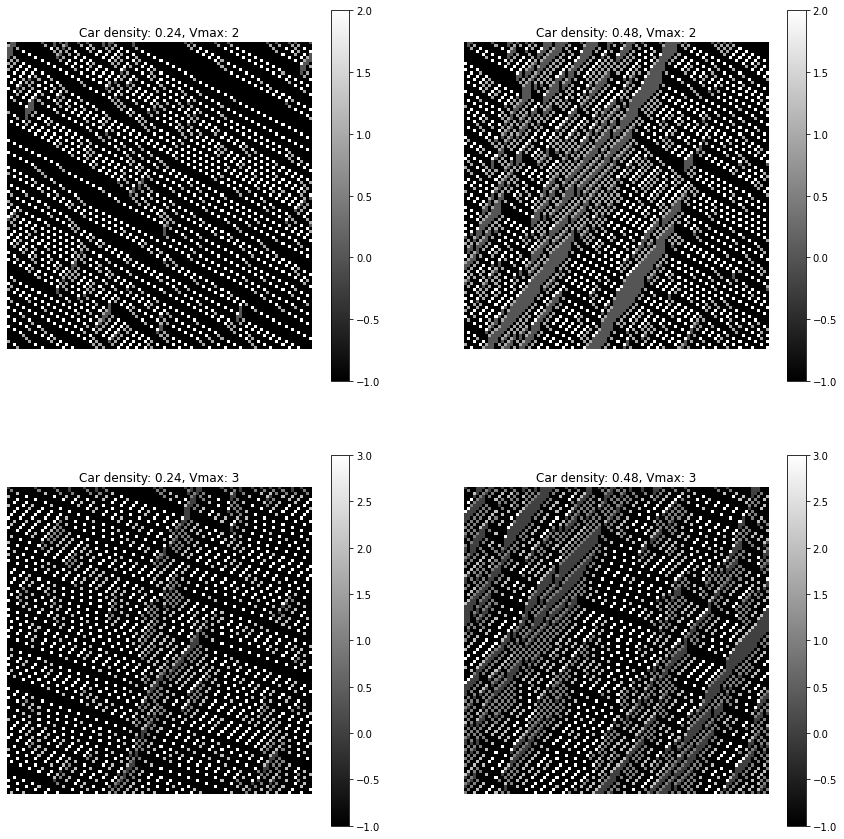

In [99]:
plt.figure(figsize =(15,15))
for i, density in enumerate(car_density):
    for j in range(2):
        image, _ = cellular_automata(N, density, 100, Vmax + j, probability)
        plt.subplot(2, 2, i+1+2*j)
        plt.imshow(image, cmap='gray')
        plt.colorbar() 
        plt.title(f'Car density: {density}, Vmax: {Vmax + j}')
        plt.axis('off')


### Utworzenie 5 animowanych GIFów przedstawiających różne sytuacje drogowe dla gęstości początkowych samochodów równych: 0.12, 0.24, 0.36, 0.48, 0.60

In [ ]:
car_density = (0.12, 0.24, 0.36, 0.48, 0.60)
for i, density in enumerate(car_density):
    _, states = cellular_automata(N, density, 100, Vmax, probability)
    biger_states = [state.reshape(1,-1).repeat(50, axis=0).repeat(50, axis=1) for state in states]
    imageio.mimsave('car_density_'+str(density)+'.gif', biger_states, 'GIF')

Dla niskiej gęstości poczatkowej samochodów (12%) występuje ruch laminarny

Dla wyższych przetestowanych gęstości pojawiają się fale start-stop oraz korki. Im większa gęstość początkowa samochodów tym więcej występuje korków i fali start-stop